In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import os
from scipy.interpolate import interp1d

In [ ]:
%matplotlib inline

In [22]:
import matplotlib as mpl
mpl.rcParams.update({'font.size': 13})
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

In [3]:
recdir = '/home/niell_lab/Goeppert/nlab-nas/Dylan/freely_moving_ephys/ephys_recordings/020422/J577RT/fm1'

In [4]:
df = pd.read_hdf(os.path.join(recdir,'020422_J577RT_control_Rig2_fm1_ephys_props.h5'))

In [5]:
t0 = df['t0'].iloc[0]

In [17]:
theta = df['FmLt_theta'].iloc[0]
gyroz = df['FmLt_gyro_z'].iloc[0]
eyeT = df['FmLt_eyeT'].iloc[0]
imuT = df['FmLt_imuT'].iloc[0]

In [18]:
gyroz_interp = interp1d(imuT, gyroz, bounds_error=False)(eyeT)

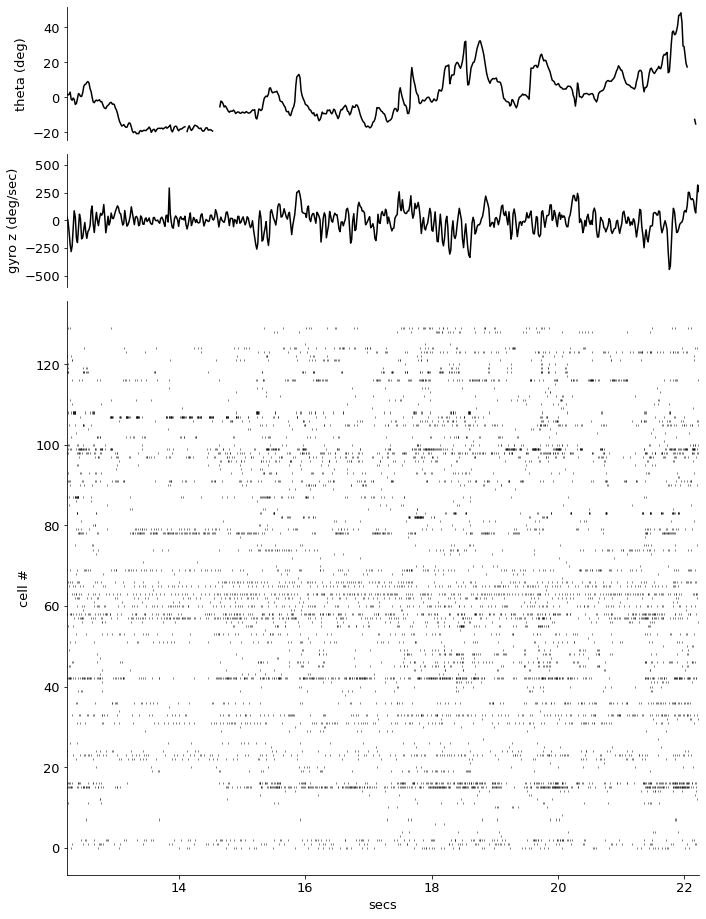

In [100]:
fig = plt.figure(figsize=(10,13))
gs = fig.add_gridspec(6,1)

df.reset_index(inplace=True, drop=True)

fstart = 800
twin = 10
win = 60*twin
tstart = eyeT[fstart]

ax_theta = fig.add_subplot(gs[0,:])
ax_gyro = fig.add_subplot(gs[1,:])
ax_raster = fig.add_subplot(gs[2:,:])

theta2plot = theta[fstart:fstart+win]
theta2plot = theta2plot - np.nanmean(theta2plot)
ax_theta.plot(eyeT[fstart:fstart+win], theta2plot, 'k')
ax_theta.set_ylabel('theta (deg)')
# ax_theta.set_ylim(-50,0)
ax_theta.spines['bottom'].set_visible(False)
ax_theta.set_xticks([])
ax_theta.set_xlim([tstart, tstart+twin])

ax_gyro.plot(eyeT[fstart:fstart+win], gyroz_interp[fstart:fstart+win], 'k')
# ax_gyro.set_xlim(tr[0], tr[1])
ax_gyro.set_ylabel('gyro z (deg/sec)')
ax_gyro.set_ylim(-600,600)
ax_gyro.spines['bottom'].set_visible(False)
ax_gyro.set_xticks([])
ax_gyro.set_xlim([tstart, tstart+twin])

sh_num = 4
sh0 = np.arange(0, len(df.index)+sh_num, sh_num)
full_raster = np.array([]).astype(int)
n_units = len(df.index)
for sh in range(sh_num):
    full_raster = np.concatenate([full_raster, sh0+sh])
for i, ind in enumerate(df.index):
#     ix = full_raster[i] + np.size(full_raster,0)
    spikes = np.array(df.at[ind,'spikeT'])
    spikes = spikes[(spikes>tstart) * (spikes<(tstart+twin))]
    ax_raster.vlines(spikes, i-0.25, i+0.25, color='k', linewidth=0.5)
# ax_raster.set_xlim([tstart,tstart+win])
# ax_raster.set_ylim(n_units,-.5)
ax_raster.set_xlabel('secs')
ax_raster.set_ylabel('cell #')
# ax_raster.set_yticks(np.arange(130,270,10), np.arange(0,n_units,10))
ax_raster.set_xlim([tstart, tstart+twin])
# ax_raster.set_xticks(np.arange(tstart, tstart+twin), np.arange(0,12,2))

plt.tight_layout()

fig.savefig('/home/niell_lab/Desktop/raster.pdf')